In [311]:
import numpy as np
import pandas as pd
pd.set_option('display.max.rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style='ticks')

# 1) Поиск и выбор набора данных для построения моделей машинного обучения.

In [312]:
data = pd.read_csv('data/kc_house_data.csv')

### House Sales in King County, USA

Predict house price using regression

https://www.kaggle.com/harlfoxem/housesalesprediction

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

19 house features plus the price and the id columns, along with 21613 observations:
* id – a notation for a house
* date – Date house was sold
* price – Price is prediction target
* bedrooms – Number of Bedrooms/House
* bathrooms – Number of bathrooms/House
* sqft_living – square footage of the home
* sqft_lot – square footage of the lot
* floors – Total floors (levels) in house
* waterfront – House which has a view to a waterfront
* view – Has been viewed
* condition – How good the condition is ( Overall )
* grade – overall grade given to the housing unit, based on King County grading system
* sqft_above – square footage of house apart from basement
* sqft_basement – square footage of the basement
* yr_built – Built Year
* yr_renovated – Year when house was renovated
* zipcode – zip
* lat – Latitude coordinate
* long – Longitude coordinate
* sqft_living15 – Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 – lotSize area in 2015(implies-- some renovations)

In [313]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [314]:
data.shape

(21613, 21)

In [315]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 2) Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [316]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


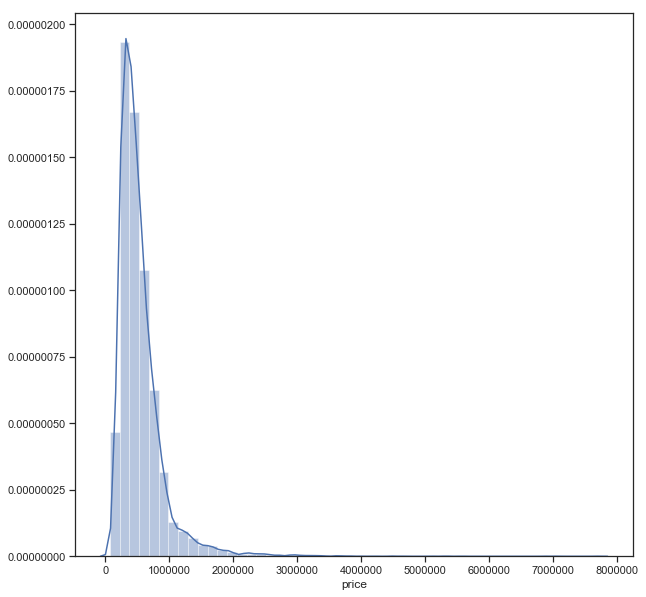

In [317]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['price'])

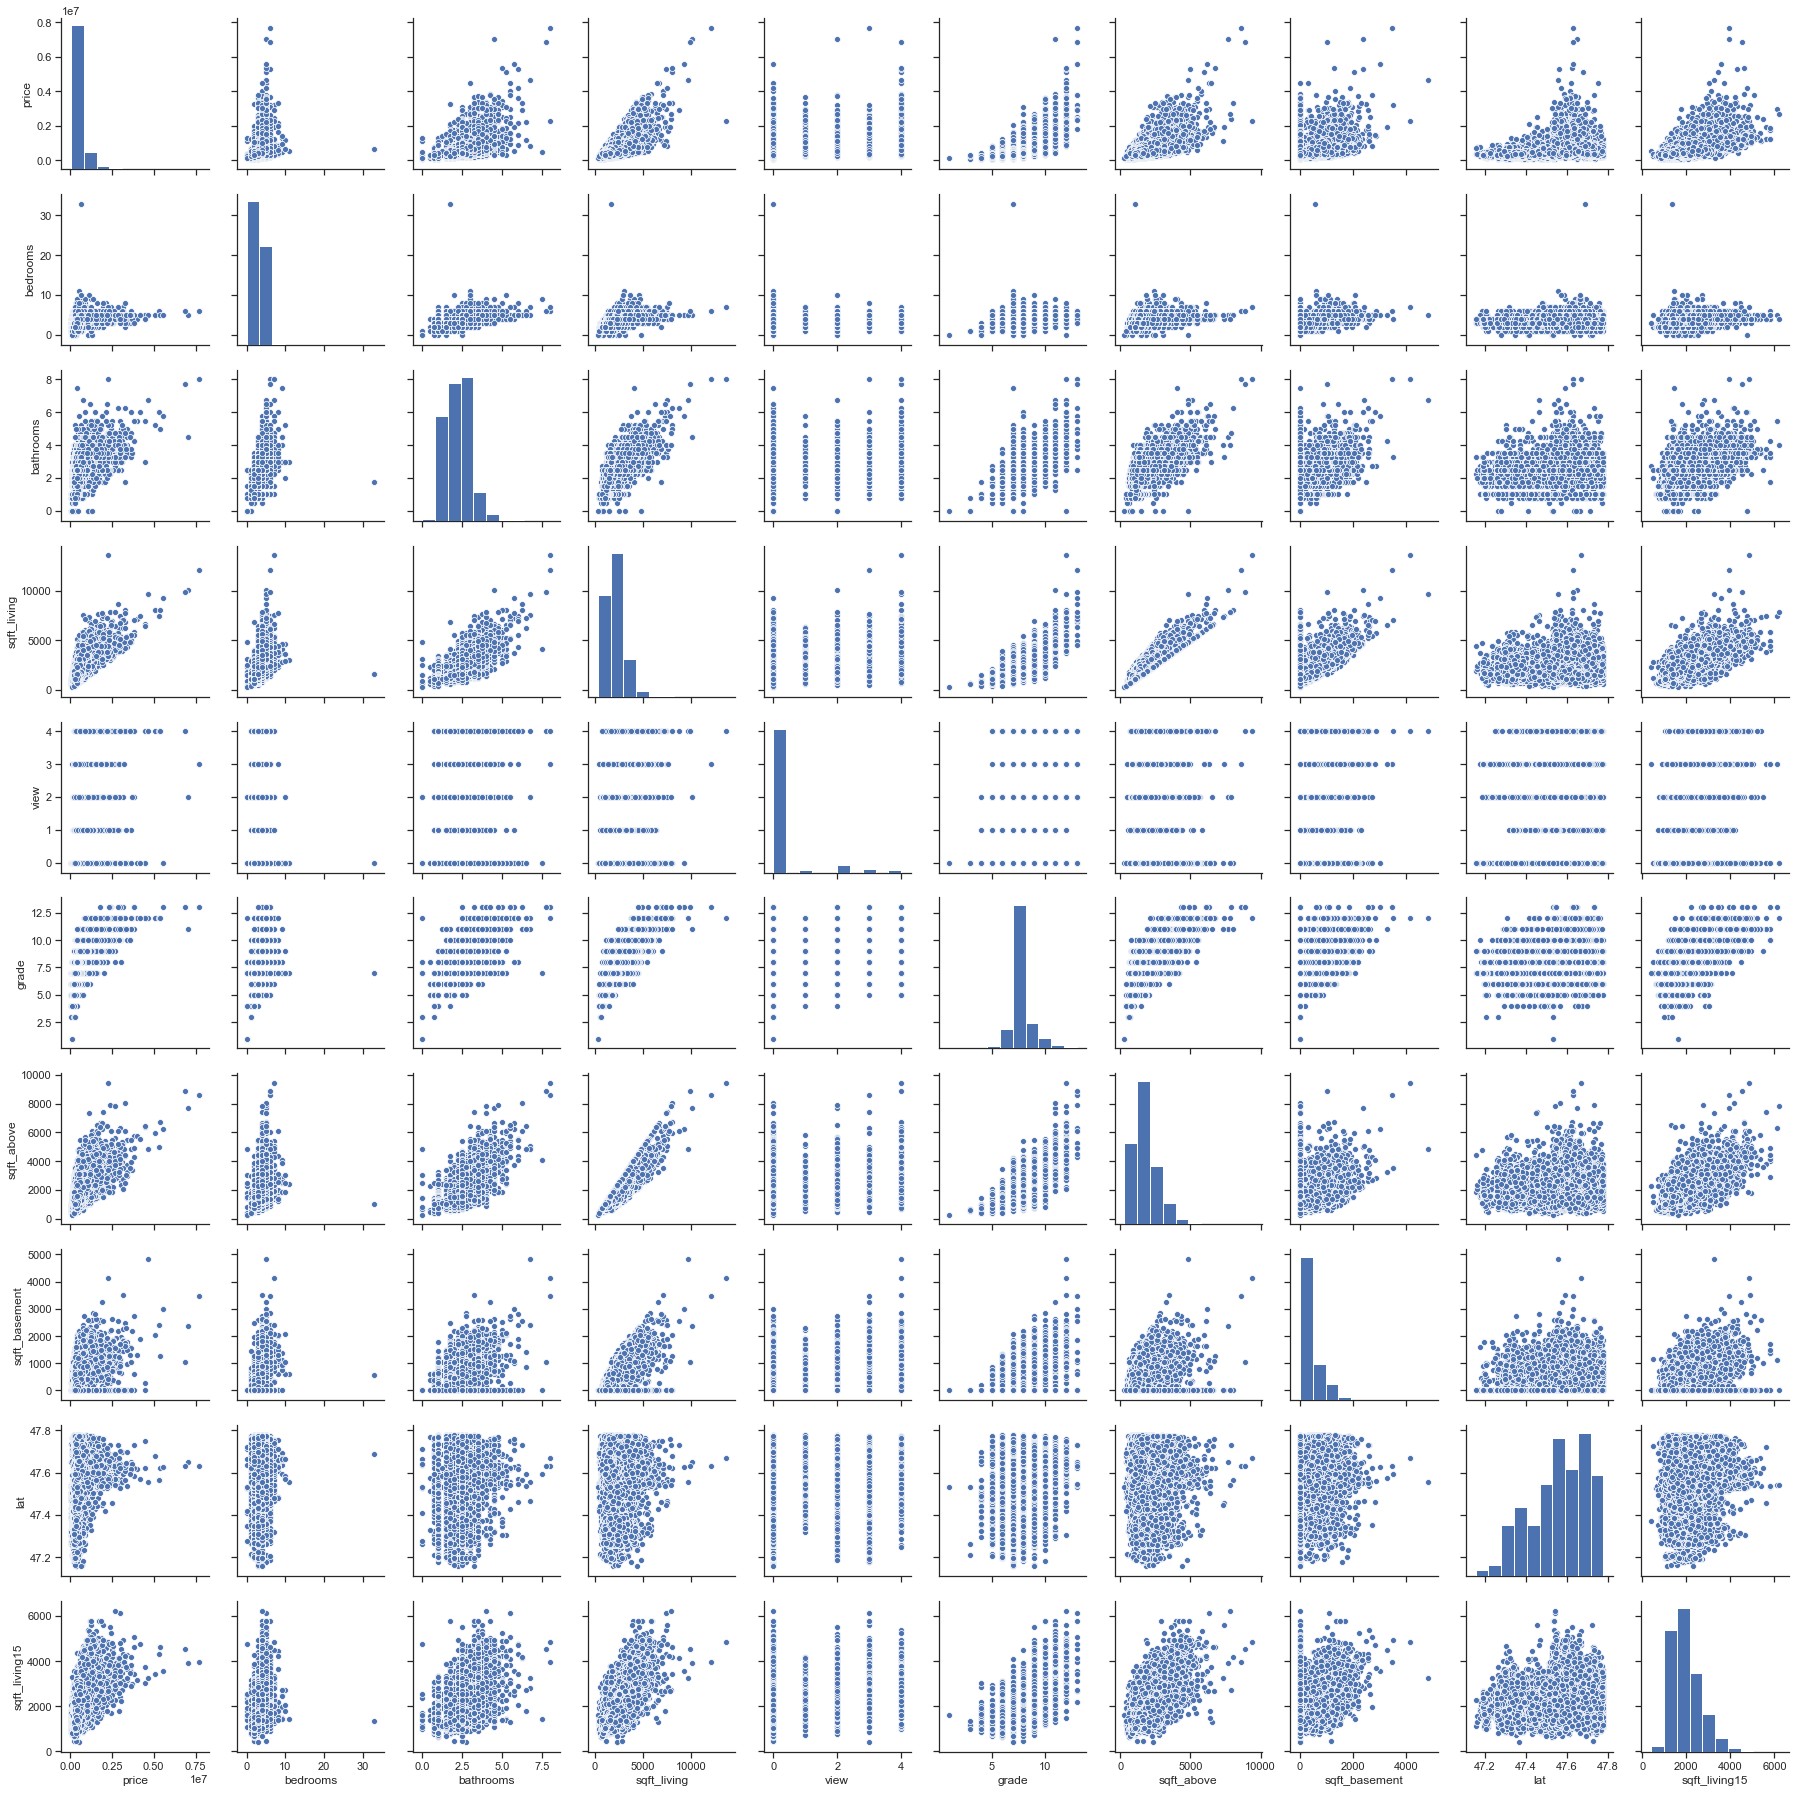

In [424]:
sns.pairplot(data)  # парные диаграммы

In [319]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пропусков нет, заполнять нечего.

# 3) Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [320]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


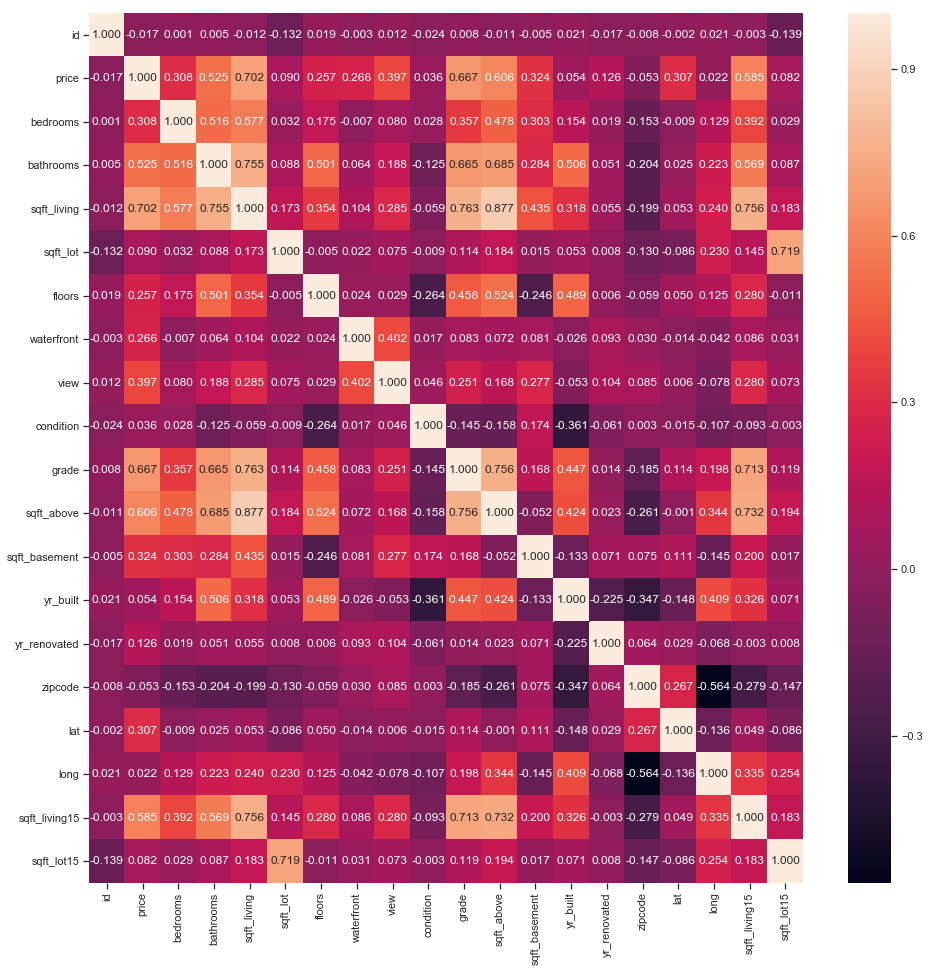

In [321]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

Целевой признак – `price` (цена). Возьмем только те фичи, которые коррелируют с целевым признаком средне и сильно (≥ 0.3 по модулю)

In [322]:
# уберем ID
data = data.drop(columns='id')
# ≤ 0.3
data = data.drop(columns=['sqft_lot', 'floors', 'waterfront', 'condition', 'yr_built', 'yr_renovated',
                          'zipcode', 'long', 'sqft_lot15'])

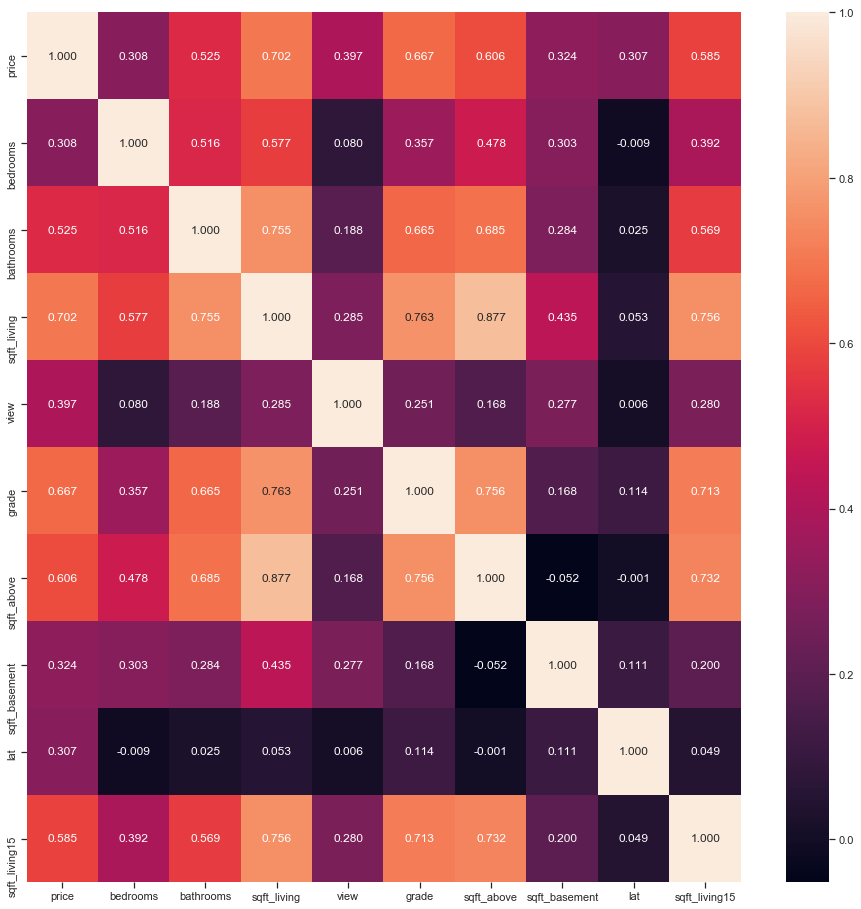

In [323]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [324]:
# дропнем коллинеарные фичи:
# data = data.drop(columns=['grade', 'sqft_above', 'bathrooms'])

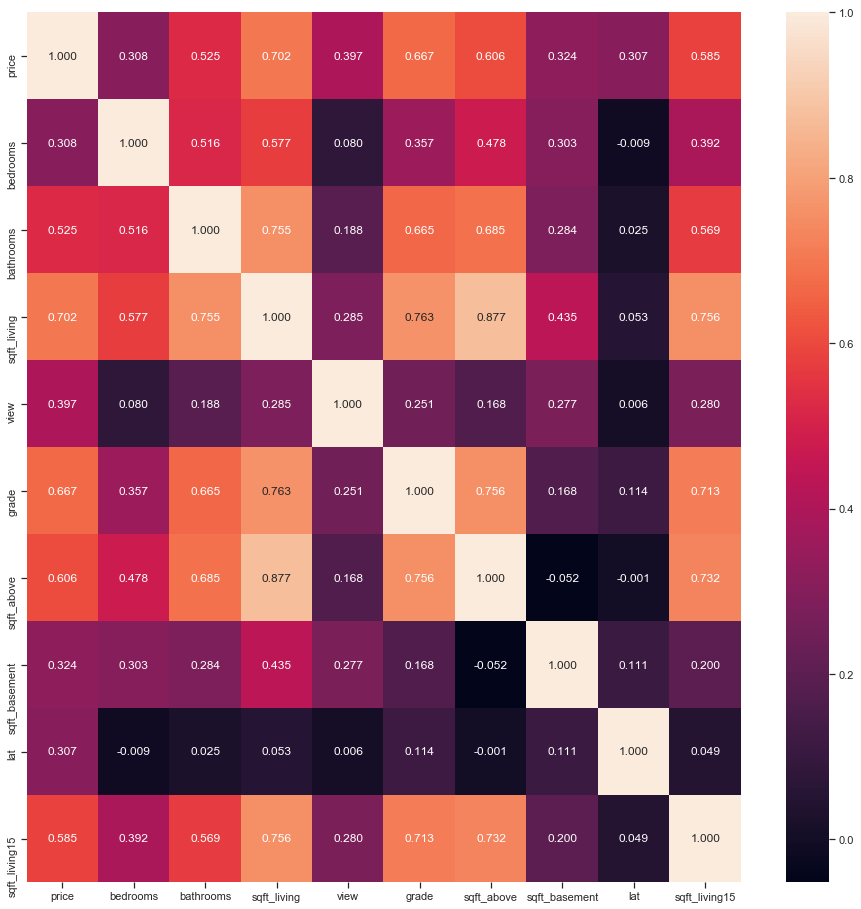

In [325]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), annot=True, fmt='.3f')

### Кодирование категориальных признаков

In [326]:
cat_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col)
cat_cols

['date']

In [327]:
for col in cat_cols:
    print('`{}`: {} unique values'.format(col, len(data[col].unique())))

`date`: 372 unique values


In [328]:
from sklearn.preprocessing import LabelEncoder

In [329]:
encoding_of_cat = {}
for col in cat_cols:
    le = LabelEncoder()
    data[[col]] = le.fit_transform(data[col])
    encoding_of_cat[col] = le

In [330]:
data.corr()

,date,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
date,1.000000,-0.004649,-0.016964,-0.034481,-0.034570,-0.001837,-0.040040,-0.027890,-0.019554,-0.032851,-0.031653
price,-0.004649,1.000000,0.308350,0.525138,0.702035,0.397293,0.667434,0.605567,0.323816,0.307003,0.585379
bedrooms,-0.016964,0.308350,1.000000,0.515884,0.576671,0.079532,0.356967,0.477600,0.303093,-0.008931,0.391638
bathrooms,-0.034481,0.525138,0.515884,1.000000,0.754665,0.187737,0.664983,0.685342,0.283770,0.024573,0.568634
sqft_living,-0.034570,0.702035,0.576671,0.754665,1.000000,0.284611,0.762704,0.876597,0.435043,0.052529,0.756420
view,-0.001837,0.397293,0.079532,0.187737,0.284611,1.000000,0.251321,0.167649,0.276947,0.006157,0.280439
grade,-0.040040,0.667434,0.356967,0.664983,0.762704,0.251321,1.000000,0.755923,0.168392,0.114084,0.713202
sqft_above,-0.027890,0.605567,0.477600,0.685342,0.876597,0.167649,0.755923,1.000000,-0.051943,-0.000816,0.731870
sqft_basement,-0.019554,0.323816,0.303093,0.283770,0.435043,0.276947,0.168392,-0.051943,1.000000,0.110538,0.200355
lat,-0.032851,0.307003,-0.008931,0.024573,0.052529,0.006157,0.114084,-0.000816,0.110538,1.000000,0.048858


In [331]:
print('`date` corr:', data.corr()['price']['date'])

`date` corr: -0.0046490362965513525


Целевой признак `price` слабо коррелирует с `date`, удалим `date`

In [332]:
data = data.drop(columns='date')

# 4) Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

In [333]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.000000,0.308350,0.525138,0.702035,0.397293,0.667434,0.605567,0.323816,0.307003,0.585379
bedrooms,0.308350,1.000000,0.515884,0.576671,0.079532,0.356967,0.477600,0.303093,-0.008931,0.391638
bathrooms,0.525138,0.515884,1.000000,0.754665,0.187737,0.664983,0.685342,0.283770,0.024573,0.568634
sqft_living,0.702035,0.576671,0.754665,1.000000,0.284611,0.762704,0.876597,0.435043,0.052529,0.756420
view,0.397293,0.079532,0.187737,0.284611,1.000000,0.251321,0.167649,0.276947,0.006157,0.280439
grade,0.667434,0.356967,0.664983,0.762704,0.251321,1.000000,0.755923,0.168392,0.114084,0.713202
sqft_above,0.605567,0.477600,0.685342,0.876597,0.167649,0.755923,1.000000,-0.051943,-0.000816,0.731870
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.276947,0.168392,-0.051943,1.000000,0.110538,0.200355
lat,0.307003,-0.008931,0.024573,0.052529,0.006157,0.114084,-0.000816,0.110538,1.000000,0.048858
sqft_living15,0.585379,0.391638,0.568634,0.756420,0.280439,0.713202,0.731870,0.200355,0.048858,1.000000


Корреляция была проанализирована выше ([тут](#3\)-Выбор-признаков,-подходящих-для-построения-моделей.-Кодирование-категориальных-признаков-Масштабирование-данных.-Формирование-вспомогательных-признаков,-улучшающих-качество-моделей.)), выброшены признаки с слабой зависимостью с целевым признаком `price`, он имеет сильную зависимость с `sqft_living`, с остальными – среднюю.

# 5) Выбор метрик для последующей оценки качества моделей.

Перед нами стоит задача регрессии, необходимо выбрать 3 метрики, подходящие для регрессии.

In [334]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
my_metrics = (mean_absolute_error, median_absolute_error, r2_score)

from sklearn.model_selection import cross_validate, KFold, ShuffleSplit
cross_val_names = ('neg_mean_absolute_error', 'neg_median_absolute_error', 'r2')

Выбрана метрика `mean_absolute_error`, поскольку она проста и очевидна, так как отражает разницу в среднем промахе модели (|y - y'| для 1 случая, суммируем N случаев, усредняем, деля на N).

Выбрана метрика `median_absolute_error`, поскольку она устойчива к выбросам (медиана из всех случаев |y - y'|).

Выбрана метрика `r2_score`, поскольку она представляет собой универсальную меру зависимости одной случайной величины от множества других.

In [335]:
def print_metrics(y_true, y_pred):
    for m in my_metrics:
        print('Metric {}: {}'.format(m.__name__, m(y_true, y_pred)))
        
def print_cross_val_scores(model, X_, y_, cv):
    print(cross_validate(model(), X_, y_, scoring=cross_val_names, cv=cv, return_train_score=True))

# 6) Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Перед нами задача регрессии, выбраны следующие модели:
* LinearRegression
* LinearSVR
* DecisionTreeRegressor
* Ensemble: BaggingRegressor with DecisionTreeRegressor
* Ensemble: Gradient boosting (XGBRegressor from xgboost library)

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

# 7) Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [337]:
from sklearn.model_selection import train_test_split

In [338]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [339]:
test_size = 0.3
state = 42
X, y = data[data.columns[range(1, data.shape[1])]], data[data.columns[[0]]]
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=test_size, random_state=state)
len(xTrain), len(xTest), len(yTrain), len(yTest)

(15129, 6484, 15129, 6484)

In [340]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [341]:
y.columns

Index(['price'], dtype='object')

# Решение задачи регрессии

# 8) Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

### LinearRegression

In [342]:
lin_reg = LinearRegression(n_jobs=-1)  # no hyperparams
lin_reg.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [343]:
yPredicted_lin_reg = lin_reg.predict(xTest)

In [344]:
print_metrics(yTest, yPredicted_lin_reg)

Metric mean_absolute_error: 139654.25998331458
Metric median_absolute_error: 93998.91289327666
Metric r2_score: 0.6331075681984636


### LinearSVR

In [368]:
from sklearn.preprocessing import Normalizer
normalizerX = Normalizer().fit(X)
X_n = normalizerX.transform(X)

test_size = 0.3
state = 42
xTrain_n, xTest_n = train_test_split(X_n, test_size=test_size, random_state=state)
print(len(xTrain_n), len(xTest_n))

lin_svr = LinearSVR(C=1.0, max_iter=1000)
lin_svr.fit(xTrain_n, yTrain.values.ravel())

15129 6484


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [369]:
yPredicted_lin_svr = lin_svr.predict(xTest)

In [370]:
print_metrics(yTest, yPredicted_lin_svr)

Metric mean_absolute_error: 50270369.62206803
Metric median_absolute_error: 45918359.11039731
Metric r2_score: -20096.001594459798


### DecisionTreeRegressor

In [348]:
tree = DecisionTreeRegressor(random_state=state)  # with default hyperparams
tree.fit(xTrain, yTrain.values.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [349]:
yPredicted_tree = tree.predict(xTest)

In [350]:
print_metrics(yTest, yPredicted_tree)

Metric mean_absolute_error: 129773.90270923298
Metric median_absolute_error: 70000.5
Metric r2_score: 0.5664820790736267


### Ensemble: BaggingRegressor with DecisionTreeRegressor

In [351]:
bagreg_treereg = BaggingRegressor(DecisionTreeRegressor(random_state=state), n_estimators=100)
bagreg_treereg.fit(xTrain, yTrain.values.ravel())

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [352]:
yPredicted_bagreg_treereg = bagreg_treereg.predict(xTest)

In [353]:
print_metrics(yTest, yPredicted_bagreg_treereg)

Metric mean_absolute_error: 94834.9737203201
Metric median_absolute_error: 51491.19999999995
Metric r2_score: 0.7686480983618686


### Ensemble: Gradient boosting (XGBRegressor from xgboost library)

In [354]:
xgbreg_treereg = XGBRegressor(n_jobs=-1)
xgbreg_treereg.fit(xTrain, yTrain.values.ravel())

[14:21:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [355]:
yPredicted_xgbreg_treereg = xgbreg_treereg.predict(xTest)

In [356]:
print_metrics(yTest, yPredicted_xgbreg_treereg)

Metric mean_absolute_error: 99196.6039096237
Metric median_absolute_error: 56986.390625
Metric r2_score: 0.7605725228859841


# 9) Подбор гиперпараметров для выбранных моделей.

In [359]:
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit

### LinearSVR

In [381]:
parameters = [{'C': np.array(np.arange(0.1, 20.1, 0.1)),
               'max_iter': np.array([1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000])}]
lin_svr_grid = GridSearchCV(LinearSVR(), parameters, cv=ShuffleSplit(n_splits=10, test_size=test_size),
                            scoring='neg_median_absolute_error', 
                            n_jobs=-1, 
                            verbose=10
                           )
lin_svr_grid.fit(X_n, y.values.ravel())

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1710s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0703s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:    3.1s
[Parallel(n_j

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': array([ 0.1,  0.2, ..., 19.9, 20. ]), 'max_iter': array([   1000,    5000,   10000,   25000,   50000,  100000,  250000,
        500000, 1000000])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_median_absolute_error', verbose=10)

In [390]:
lin_svr_grid.best_estimator_

LinearSVR(C=20.000000000000004, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000,
     random_state=None, tol=0.0001, verbose=0)

In [391]:
lin_svr_grid.best_score_

-146027.5578859402

In [392]:
lin_svr_grid.best_params_

{'C': 20.000000000000004, 'max_iter': 100000}

### DecisionTreeRegressor

In [396]:
parameters = [{'random_state': np.array([state]),
               'max_depth': np.array([None, 10, 50, 100, 500, 1000, 5000, 10000]),
               'min_samples_split': np.array(range(2, 11)),
               'min_samples_leaf': np.array(range(1, 11))
              }]
tree_grid = GridSearchCV(DecisionTreeRegressor(), parameters, cv=ShuffleSplit(n_splits=10, test_size=0.2),
                         scoring='neg_median_absolute_error', 
                         n_jobs=-1, 
                         verbose=10
                        )
tree_grid.fit(X, y.values.ravel())

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'random_state': array([42]), 'max_depth': array([None, 10, 50, 100, 500, 1000, 5000, 10000], dtype=object), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_median_absolute_error', verbose=10)

In [397]:
tree_grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [398]:
tree_grid.best_score_

-58160.48411132714

In [399]:
tree_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42}

### Ensemble: BaggingRegressor with DecisionTreeRegressor

In [401]:
from sklearn.model_selection import GridSearchCV, KFold, ShuffleSplit
parameters = [{'n_estimators': np.array(range(1, 101, 5))}]
bagreg_grid = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(random_state=state)), parameters, cv=ShuffleSplit(n_splits=10, test_size=0.2),
                           scoring='neg_median_absolute_error',
                           n_jobs=-1,
                           verbose=10,
                          )
bagreg_grid.fit(X, y.values.ravel())

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
       error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
       ...stimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_median_absolute_error', verbose=10)

In [403]:
bagreg_grid.best_estimator_

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=71, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [404]:
bagreg_grid.best_score_

-50558.99342723005

In [405]:
bagreg_grid.best_params_

{'n_estimators': 71}

### Ensemble: Gradient boosting (XGBRegressor from xgboost library)

In [406]:
parameters = [{"colsample_bytree": [1.0], "min_child_weight": [0.8, 1.0, 1.2],
               'max_depth': range(3, 11), 'n_estimators': [25, 50, 75, 100]}]
xgbreg_grid = GridSearchCV(XGBRegressor(), parameters, cv=ShuffleSplit(n_splits=10, test_size=0.2),
                           scoring='neg_median_absolute_error',
                           n_jobs=-1,
                           verbose=10,
                          )
xgbreg_grid.fit(X, y.values.ravel())

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[14:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None),
       error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'colsample_bytree': [1.0], 'min_child_weight': [0.8, 1.0, 1.2], 'max_depth': range(3, 11), 'n_estimators': [25, 50, 75, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_median_absolute_error', verbose=10)

In [407]:
xgbreg_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1.0, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=0.8, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [408]:
xgbreg_grid.best_score_

-49993.25625

In [409]:
xgbreg_grid.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 10,
 'min_child_weight': 0.8,
 'n_estimators': 50}

# 10) Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### LinearSVR

In [410]:
lin_svr_grid.best_estimator_.fit(xTrain_n, yTrain.values.ravel())

yPredicted_lin_svr_new = lin_svr_grid.best_estimator_.predict(xTest_n)
print('old:')
print_metrics(yTest, yPredicted_lin_svr)

print('\nnew:')
print_metrics(yTest, yPredicted_lin_svr_new)

old:
Metric mean_absolute_error: 50270369.62206803
Metric median_absolute_error: 45918359.11039731
Metric r2_score: -20096.001594459798

new:
Metric mean_absolute_error: 262271.02348911285
Metric median_absolute_error: 147450.00928251055
Metric r2_score: -0.3718708004825009


### DecisionTreeRegressor

In [414]:
tree_grid.best_estimator_.fit(xTrain, yTrain.values.ravel())

yPredicted_tree_new = tree_grid.best_estimator_.predict(xTest)
print('old:')
print_metrics(yTest, yPredicted_tree)

print('\nnew:')
print_metrics(yTest, yPredicted_tree_new)

old:
Metric mean_absolute_error: 129773.90270923298
Metric median_absolute_error: 70000.5
Metric r2_score: 0.5664820790736267

new:
Metric mean_absolute_error: 109969.3788295769
Metric median_absolute_error: 59306.32438316394
Metric r2_score: 0.6733312258690927


### Ensemble: BaggingRegressor with DecisionTreeRegressor

In [412]:
bagreg_grid.best_estimator_.fit(xTrain, yTrain.values.ravel())

yPredicted_bagreg_treereg_new = bagreg_grid.best_estimator_.predict(xTest)
print('old:')
print_metrics(yTest, yPredicted_bagreg_treereg)

print('\nnew:')
print_metrics(yTest, yPredicted_bagreg_treereg_new)

old:
Metric mean_absolute_error: 94834.9737203201
Metric median_absolute_error: 51491.19999999995
Metric r2_score: 0.7686480983618686

new:
Metric mean_absolute_error: 94800.05277012683
Metric median_absolute_error: 51570.542253521126
Metric r2_score: 0.7697305739843688


### Ensemble: Gradient boosting (XGBRegressor from xgboost library)

In [413]:
xgbreg_grid.best_estimator_.fit(xTrain, yTrain.values.ravel())

yPredicted_xgbreg_treereg_new = xgbreg_grid.best_estimator_.predict(xTest)
print('old:')
print_metrics(yTest, yPredicted_xgbreg_treereg)

print('\nnew:')
print_metrics(yTest, yPredicted_xgbreg_treereg_new)

[14:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
old:
Metric mean_absolute_error: 99196.6039096237
Metric median_absolute_error: 56986.390625
Metric r2_score: 0.7605725228859841

new:
Metric mean_absolute_error: 93738.3927745219
Metric median_absolute_error: 51429.953125
Metric r2_score: 0.7570938895100083


# Графическая реализация

# 11) Формирование выводов о качестве построенных моделей на основе выбранных метрик. 

In [415]:
from sklearn.model_selection import learning_curve, validation_curve

In [416]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [417]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring,
        n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

### LinearRegression

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

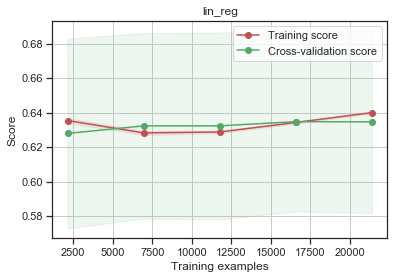

In [433]:
plot_learning_curve(lin_reg, 'lin_reg',
                    X, y.values.ravel(), cv=KFold(n_splits=100))

### DecisionTreeRegressor

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

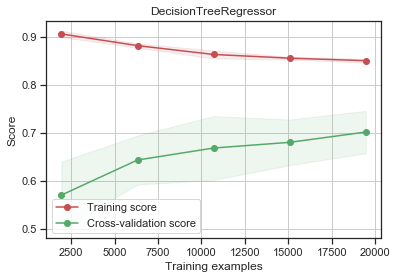

In [430]:
plot_learning_curve(tree_grid.best_estimator_, 'DecisionTreeRegressor',
                    X, y.values.ravel(), cv=KFold(n_splits=10))

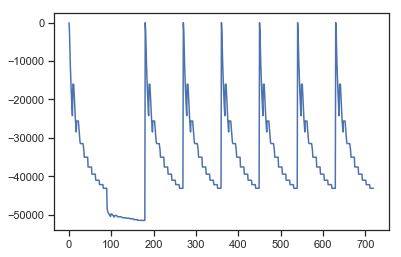

In [453]:
plt.plot(range(720), tree_grid.cv_results_['mean_train_score'])

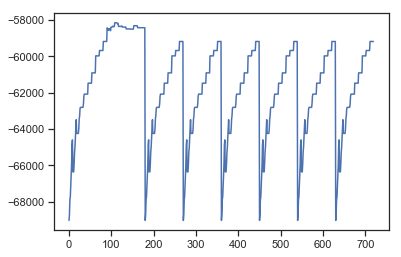

In [454]:
plt.plot(range(720), tree_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

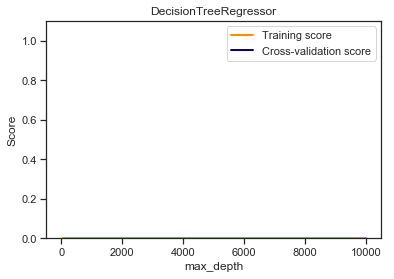

In [440]:
parameters_tree = [{'random_state': np.array([state]),
                    'max_depth': np.array([None, 10, 50, 100, 500, 1000, 5000, 10000]),
                    'min_samples_split': np.array(range(2, 11)),
                    'min_samples_leaf': np.array(range(1, 11))
                   }]

plot_validation_curve(DecisionTreeRegressor(random_state=state), 'DecisionTreeRegressor', 
                      X, y.values.ravel(), 
                      param_name='max_depth', param_range=[10, 50, 100, 500, 1000, 5000, 10000], 
                      cv=KFold(n_splits=10), scoring="neg_median_absolute_error")

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

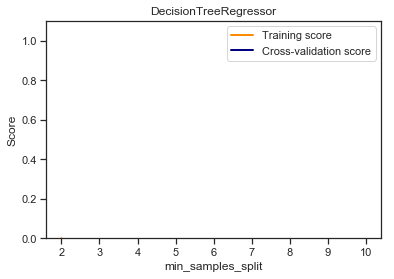

In [436]:
plot_validation_curve(DecisionTreeRegressor(random_state=state), 'DecisionTreeRegressor', 
                      X, y.values.ravel(), 
                      param_name='min_samples_split', param_range=range(2, 11), 
                      cv=KFold(n_splits=10), scoring="neg_median_absolute_error")

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

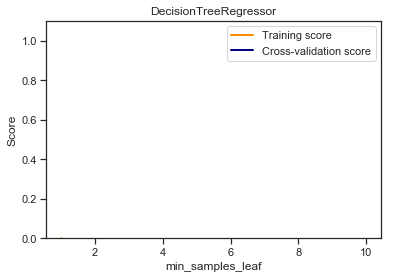

In [438]:
plot_validation_curve(DecisionTreeRegressor(random_state=state), 'DecisionTreeRegressor', 
                      X, y.values.ravel(), 
                      param_name='min_samples_leaf', param_range=range(1, 11), 
                      cv=KFold(n_splits=10), scoring="neg_median_absolute_error")

### LinearSVR

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

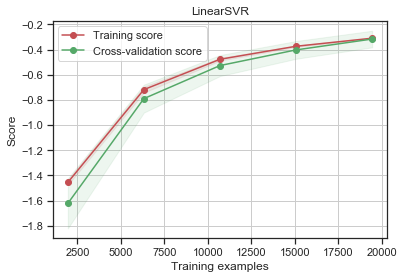

In [442]:
plot_learning_curve(lin_svr_grid.best_estimator_, 'LinearSVR',
                    X_n, y.values.ravel(), cv=KFold(n_splits=10))

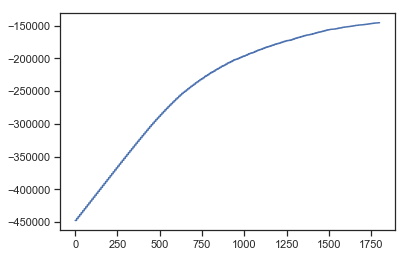

In [459]:
plt.plot(range(1800), lin_svr_grid.cv_results_['mean_train_score'])

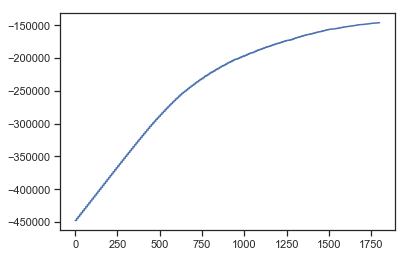

In [460]:
plt.plot(range(1800), lin_svr_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

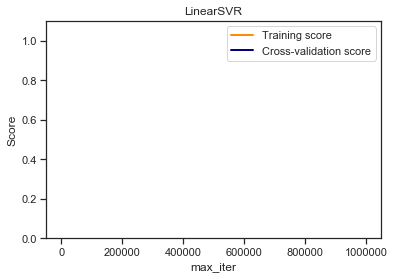

In [443]:
parameters_lin_svr = {'max_iter': np.array([1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000])}
plot_validation_curve(LinearSVR(), 'LinearSVR', 
                      X, y.values.ravel(), 
                      param_name='max_iter', param_range=[1000, 5000, 10000, 25000, 50000, 100000, 250000, 500000, 1000000], 
                      cv=KFold(n_splits=10), scoring="neg_median_absolute_error")

### Ensemble: BaggingRegressor with DecisionTreeRegressor

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

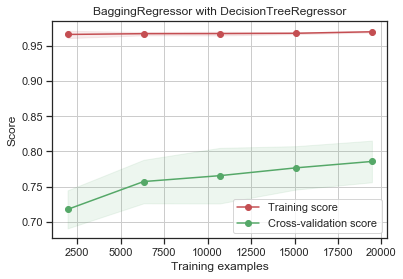

In [445]:
plot_learning_curve(bagreg_grid.best_estimator_, 'BaggingRegressor with DecisionTreeRegressor',
                    X, y.values.ravel(), cv=KFold(n_splits=10))

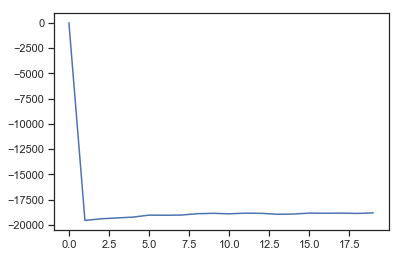

In [462]:
plt.plot(range(20), bagreg_grid.cv_results_['mean_train_score'])

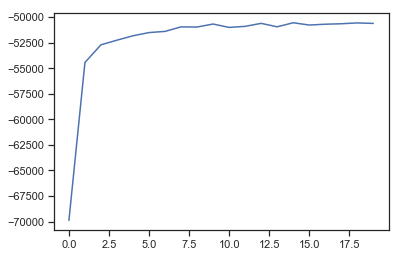

In [463]:
plt.plot(range(20), bagreg_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

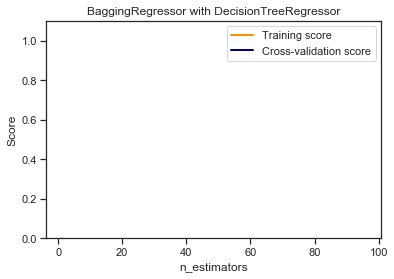

In [469]:
parameters_bagging = [{'n_estimators': np.array(range(1, 101, 5))}]


plot_validation_curve(BaggingRegressor(DecisionTreeRegressor(random_state=state)), 'BaggingRegressor with DecisionTreeRegressor', 
                      X, y.values.ravel(), 
                      param_name='n_estimators', param_range=np.array(range(1, 101, 5)), 
                      cv=KFold(n_splits=10), scoring="neg_median_absolute_error")

### Ensemble: Gradient boosting (XGBRegressor from xgboost library)

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

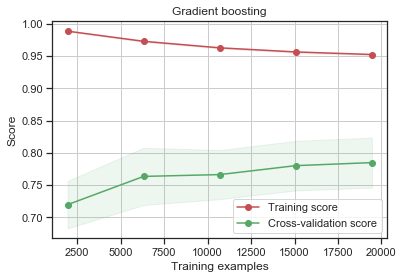

In [449]:
plot_learning_curve(xgbreg_grid.best_estimator_, 'Gradient boosting',
                    X, y.values.ravel(), cv=KFold(n_splits=10))

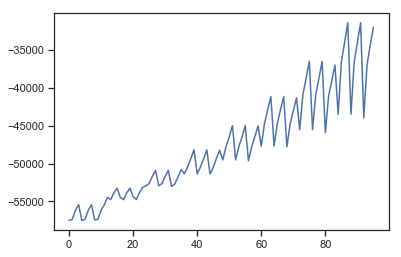

In [467]:
plt.plot(range(96), xgbreg_grid.cv_results_['mean_train_score'])

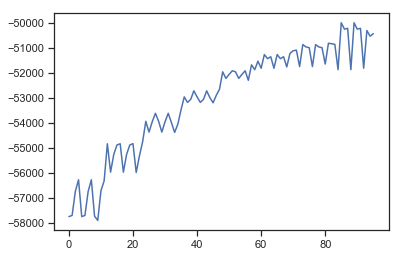

In [468]:
plt.plot(range(96), xgbreg_grid.cv_results_['mean_test_score'])

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

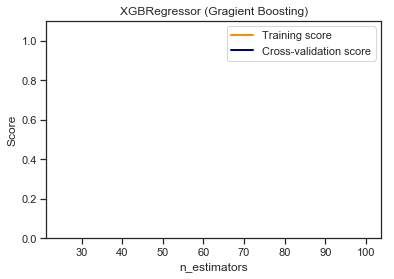

In [450]:
parameters_xgb = [{"colsample_bytree": [1.0], "min_child_weight": [0.8, 1.0, 1.2],
               'max_depth': range(3, 11), 'n_estimators': [25, 50, 75, 100]}]

plot_validation_curve(XGBRegressor(), 'XGBRegressor (Gragient Boosting)', 
                      X, y.values.ravel(), 
                      param_name='n_estimators', param_range=[25, 50, 75, 100], 
                      cv=KFold(n_splits=10), scoring="neg_median_absolute_error")